# Shopping Item Recommendation with GBDT and LR


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
import datetime

### Read data

In [3]:
df = pd.read_csv('./data/shopping-items/data.csv', sep='\t')
print(df.head(2))


FileNotFoundError: [Errno 2] No such file or directory: './data/shopping-items/data.csv'

### Analyze data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55933 entries, 0 to 55932
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    55933 non-null  int64  
 1   item_category_list         55933 non-null  object 
 2   item_property_list         55933 non-null  object 
 3   item_brand_id              55933 non-null  int64  
 4   item_city_id               55933 non-null  int64  
 5   item_price_level           55933 non-null  int64  
 6   item_sales_level           55933 non-null  int64  
 7   item_collected_level       55933 non-null  int64  
 8   item_pv_level              55933 non-null  int64  
 9   user_id                    55933 non-null  int64  
 10  user_gender_id             55933 non-null  int64  
 11  user_age_level             55933 non-null  int64  
 12  user_occupation_id         55933 non-null  int64  
 13  user_star_level            55933 non-null  int

In [ ]:
df.shape

(55933, 27)

<Axes: xlabel='is_click'>

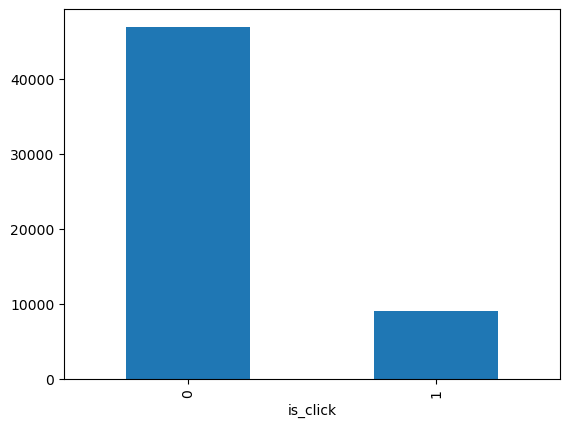

In [ ]:
df['is_click'].value_counts().plot(kind='bar')

In [ ]:


dtime = pd.DataFrame(df['date'].unique())
dtime['weekday'] = dtime.iloc[:,0].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date().weekday())
dtime

,0,weekday
0,2018-09-18,1
1,2018-09-19,2
2,2018-09-20,3
3,2018-09-21,4
4,2018-09-22,5
5,2018-09-23,6
6,2018-09-24,0


In [ ]:
df.groupby('date')['is_click'].mean()

date
2018-09-18    0.168404
2018-09-19    0.167567
2018-09-20    0.167045
2018-09-21    0.163729
2018-09-22    0.162794
2018-09-23    0.148233
2018-09-24    0.146213
Name: is_click, dtype: float64

In [ ]:
print('item_brand_id ',df['item_brand_id'].unique().size)
print('item_id ',df['item_id'].unique().size)
print('item_price_level ',df['item_price_level'].unique().size)


item_brand_id  1466
item_id  5702
item_price_level  12


In [ ]:
df.groupby('item_id')['is_click'].mean().head().reset_index()


,item_id,is_click
0,696490723789804,0.333333
1,1097631460775571,0.166667
2,1637165183538885,0.000000
3,4255654217639344,0.000000
4,6536469184064787,0.000000


### Train test split

In [ ]:
df_train = df[df['date']!='2018-09-24']
df_test = df[df['date']=='2018-09-24']

### Transform data

In [ ]:
CATEGORICAL_FEATURES = ['item_city_id','user_gender_id','user_occupation_id']
CONTINUOUS_FEATURES = ['item_price_level', 'item_sales_level', 'item_collected_level','item_pv_level', 'user_age_level', 'user_star_level', 'shop_review_num_level', 'shop_review_positive_rate',
                       'shop_star_level', 'shop_score_service', 'shop_score_delivery', 'shop_score_description']
VECTOR_FEATURES = ['item_category_list']

### Preprocessing

In [ ]:
def get_continuous_features(data):
    return data[CONTINUOUS_FEATURES]

def get_labels(data):
    return data['is_click']

def get_categorical_features(data):
    enc = OneHotEncoder()
    category_data = data[CATEGORICAL_FEATURES]
    enc.fit(category_data)
    return enc.transform(category_data).toarray()

def get_vector_features(train_data, test_data):
    train_fea , test_feat = None, None    
    for key in VECTOR_FEATURES:        
        c_vector = CountVectorizer()
        c_vector.fit(pd.concat([train_data[key], test_data[key]]))
        if train_fea is None:
            train_fea = c_vector.transform(train_data[key]).toarray()
            test_fea = c_vector.transform(test_data[key]).toarray()
        else:
            train_fea = np.stack([train_fea,c_vector.transform(train_data[key]).toarray()])
            test_fea = np.stack([test_fea,c_vector.transform(test_data[key]).toarray()])
    return train_fea, test_fea

y_train_label = get_labels(df_train)
X_train_gbdt = get_continuous_features(df_train)

y_test_label = get_labels(df_test)
X_test_gbdt = get_continuous_features(df_test)

x_train_category = get_categorical_features(df_train)
# x_test_category = get_categorical_features(df_test)
X_train_vector, X_test_vector = get_vector_features(df_train, df_test)

### Build deep FM model


In [ ]:
# train
# low dimensional feature
    # embedding categorical features
# high dimensional features

# Predict
    # 

LogisticRegression(C=100, max_iter=50, n_jobs=8)